In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes= pd.read_csv('/content/diabetes (1).csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
diabetes.duplicated().sum()

0

In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df= pd.DataFrame(diabetes)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
# outliers
np.array(diabetes)

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [13]:
# first quartile
np.percentile(diabetes, 25)

0.46225000000000005

In [14]:
# third quartile
np.percentile(diabetes, 75)

61.0

In [15]:
#interquartile range
iqr= np.percentile(diabetes, 75) - np.percentile(diabetes, 25)
iqr

60.53775

In [16]:
iqr_range= iqr*1.5
iqr_range


90.806625

In [18]:
# lower bound
iqr_range_low= np.percentile(diabetes, 25) - iqr_range
iqr_range_low

-90.344375

In [19]:
# upper bound
iqr_range_high= np.percentile(diabetes, 75) + iqr_range
iqr_range_high

151.806625

<Axes: >

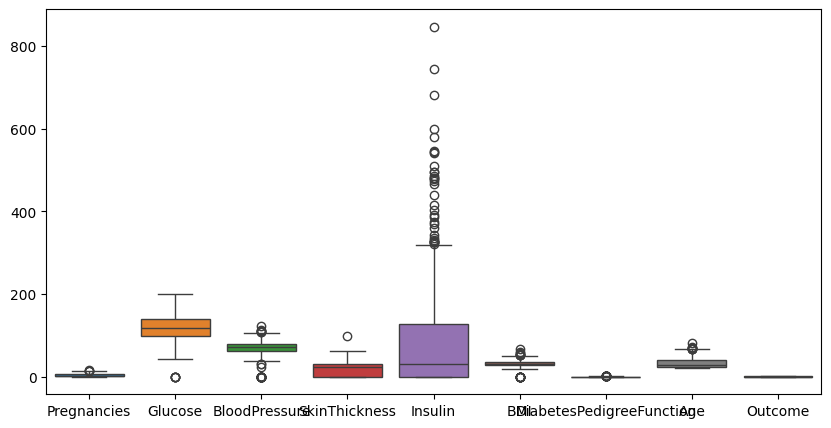

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(diabetes)

In [24]:
# replace min value with median
l= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in l:

  diabetes[i]= diabetes[i].replace(0, diabetes[i].median())

In [26]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
l1= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

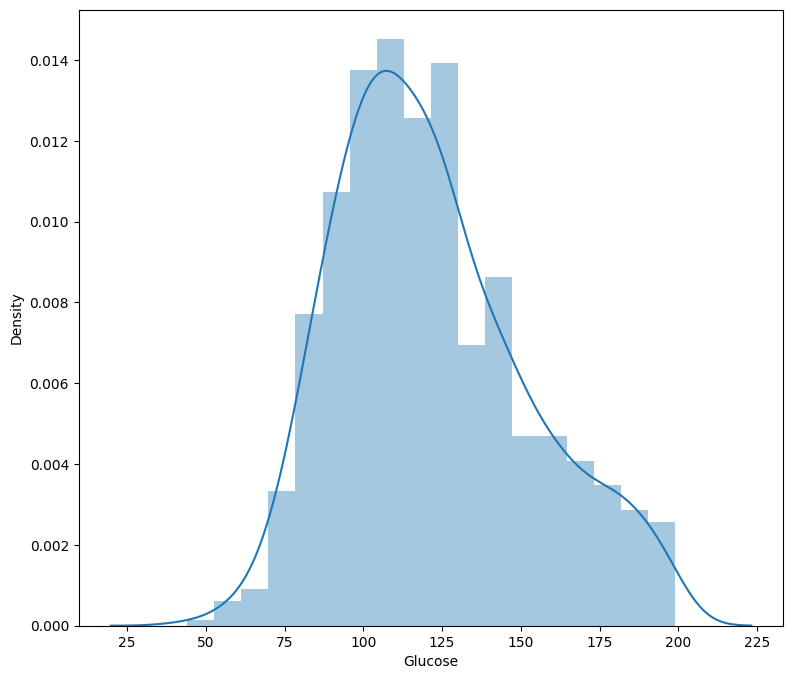

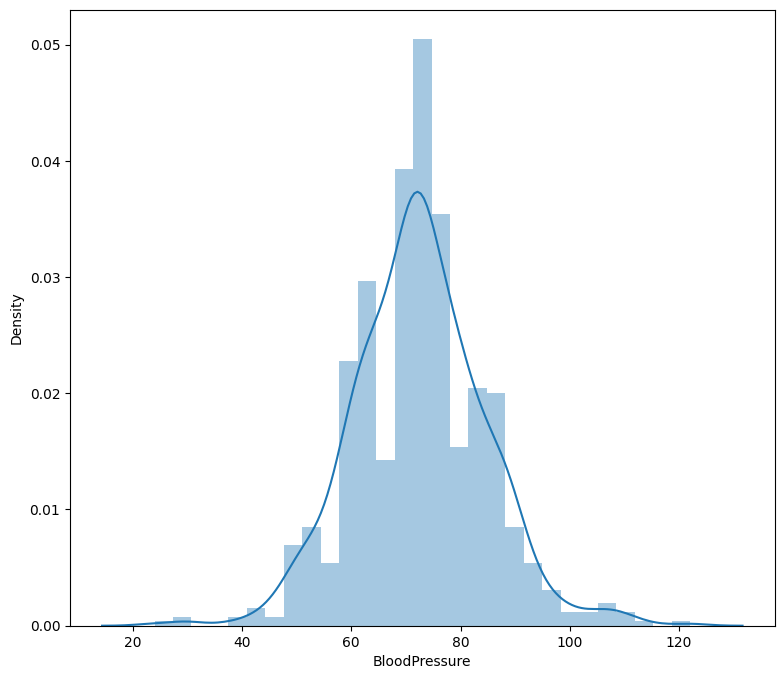

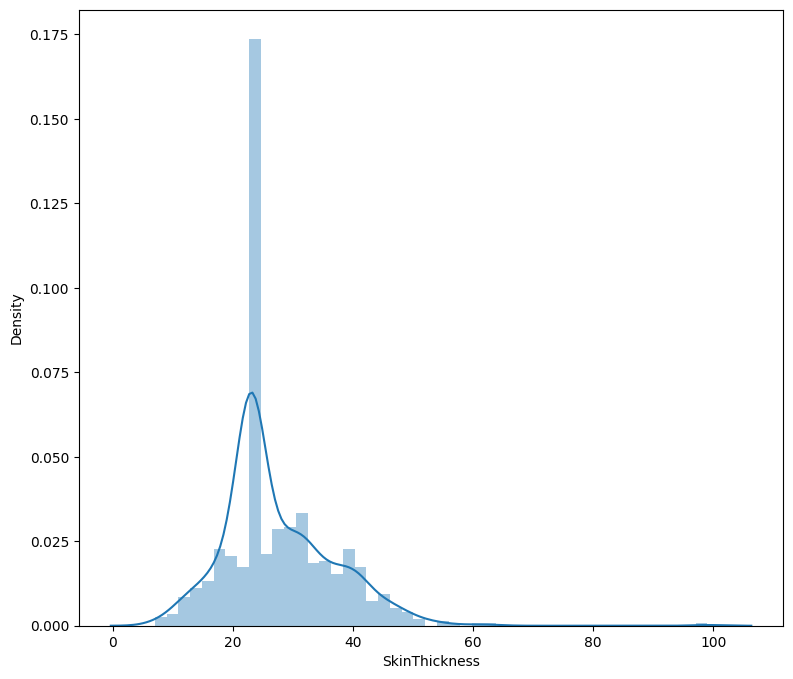

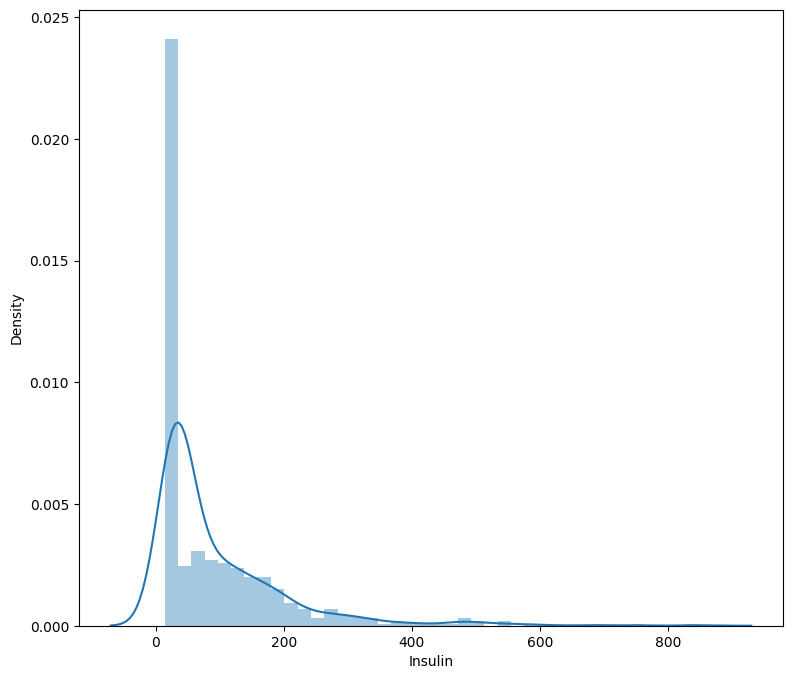

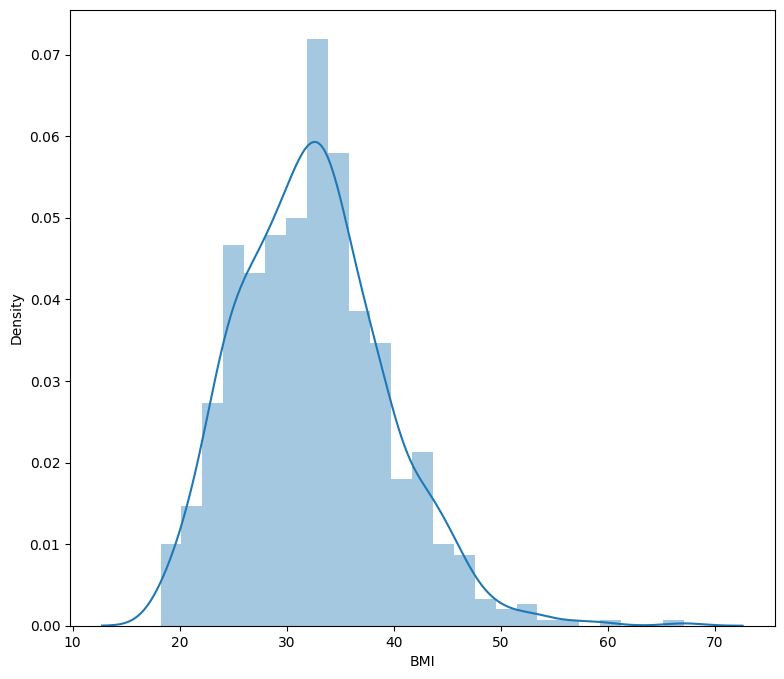

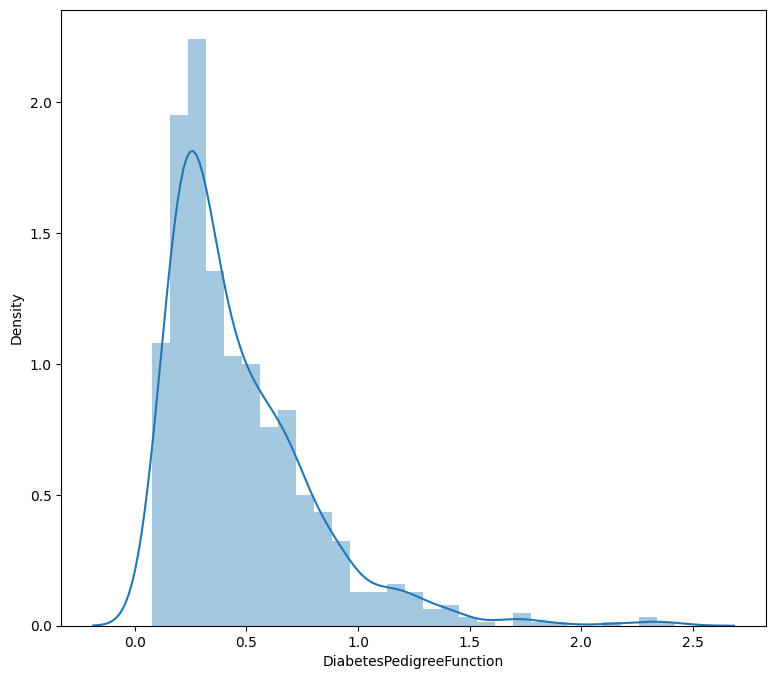

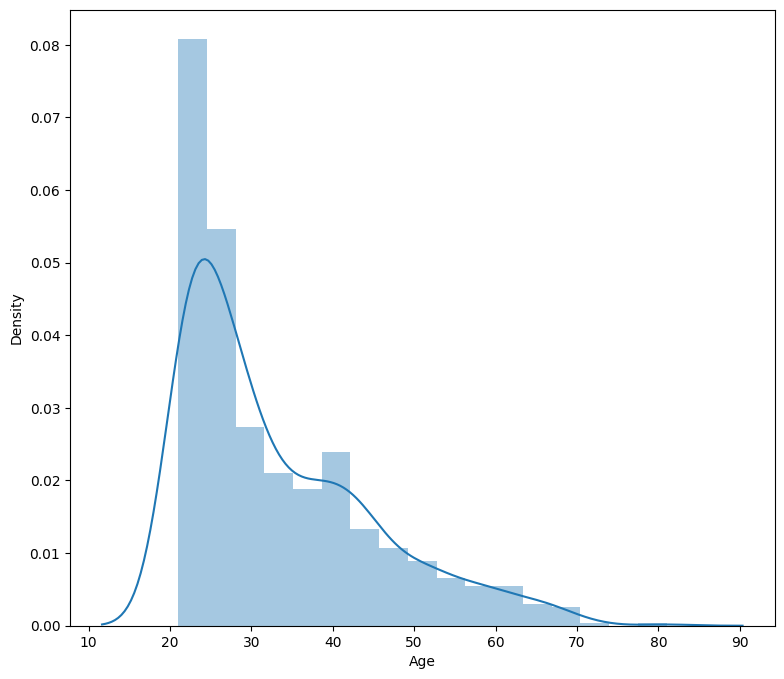

In [32]:
# Univariate analysis
for i in l1:
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  sns.distplot(diabetes[i])

<Axes: >

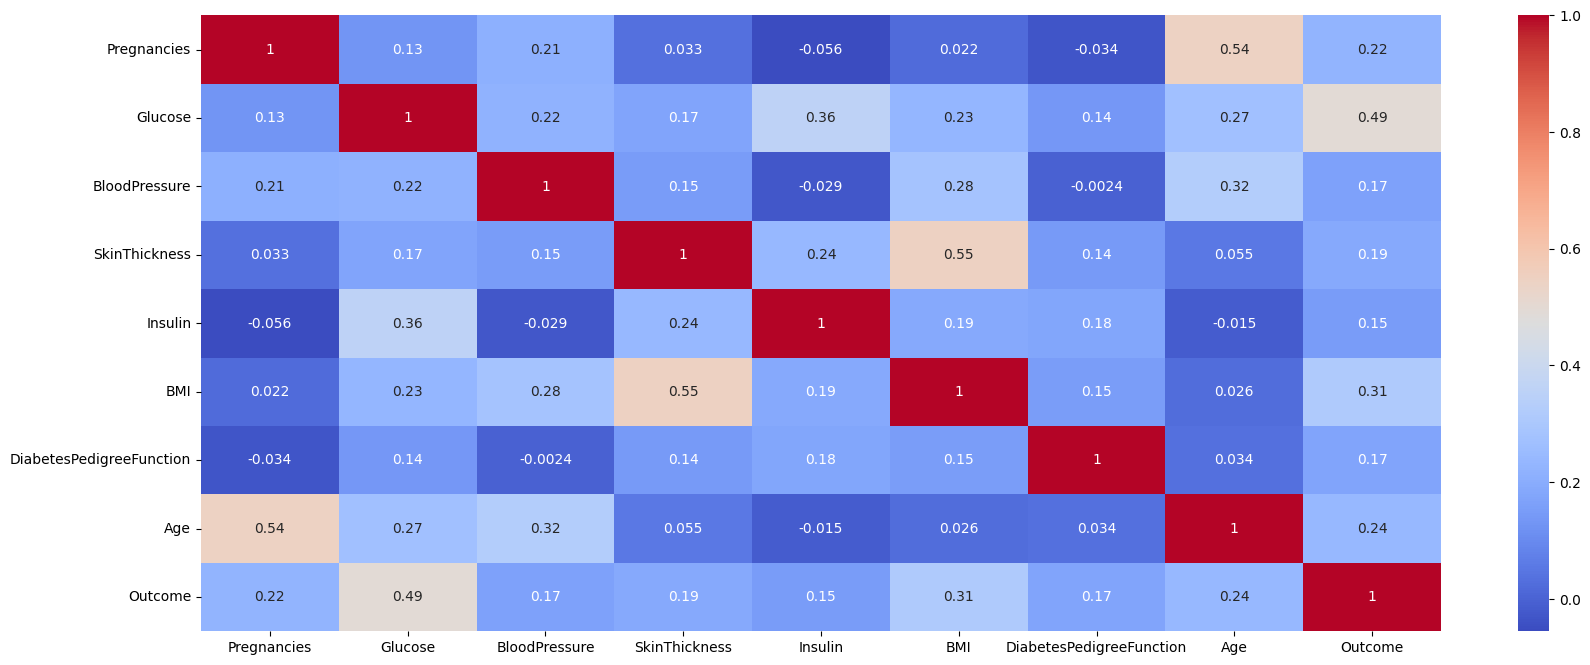

In [33]:
plt.figure(figsize=(20, 8))
sns.heatmap(diabetes.corr(), annot= True, cmap= 'coolwarm')

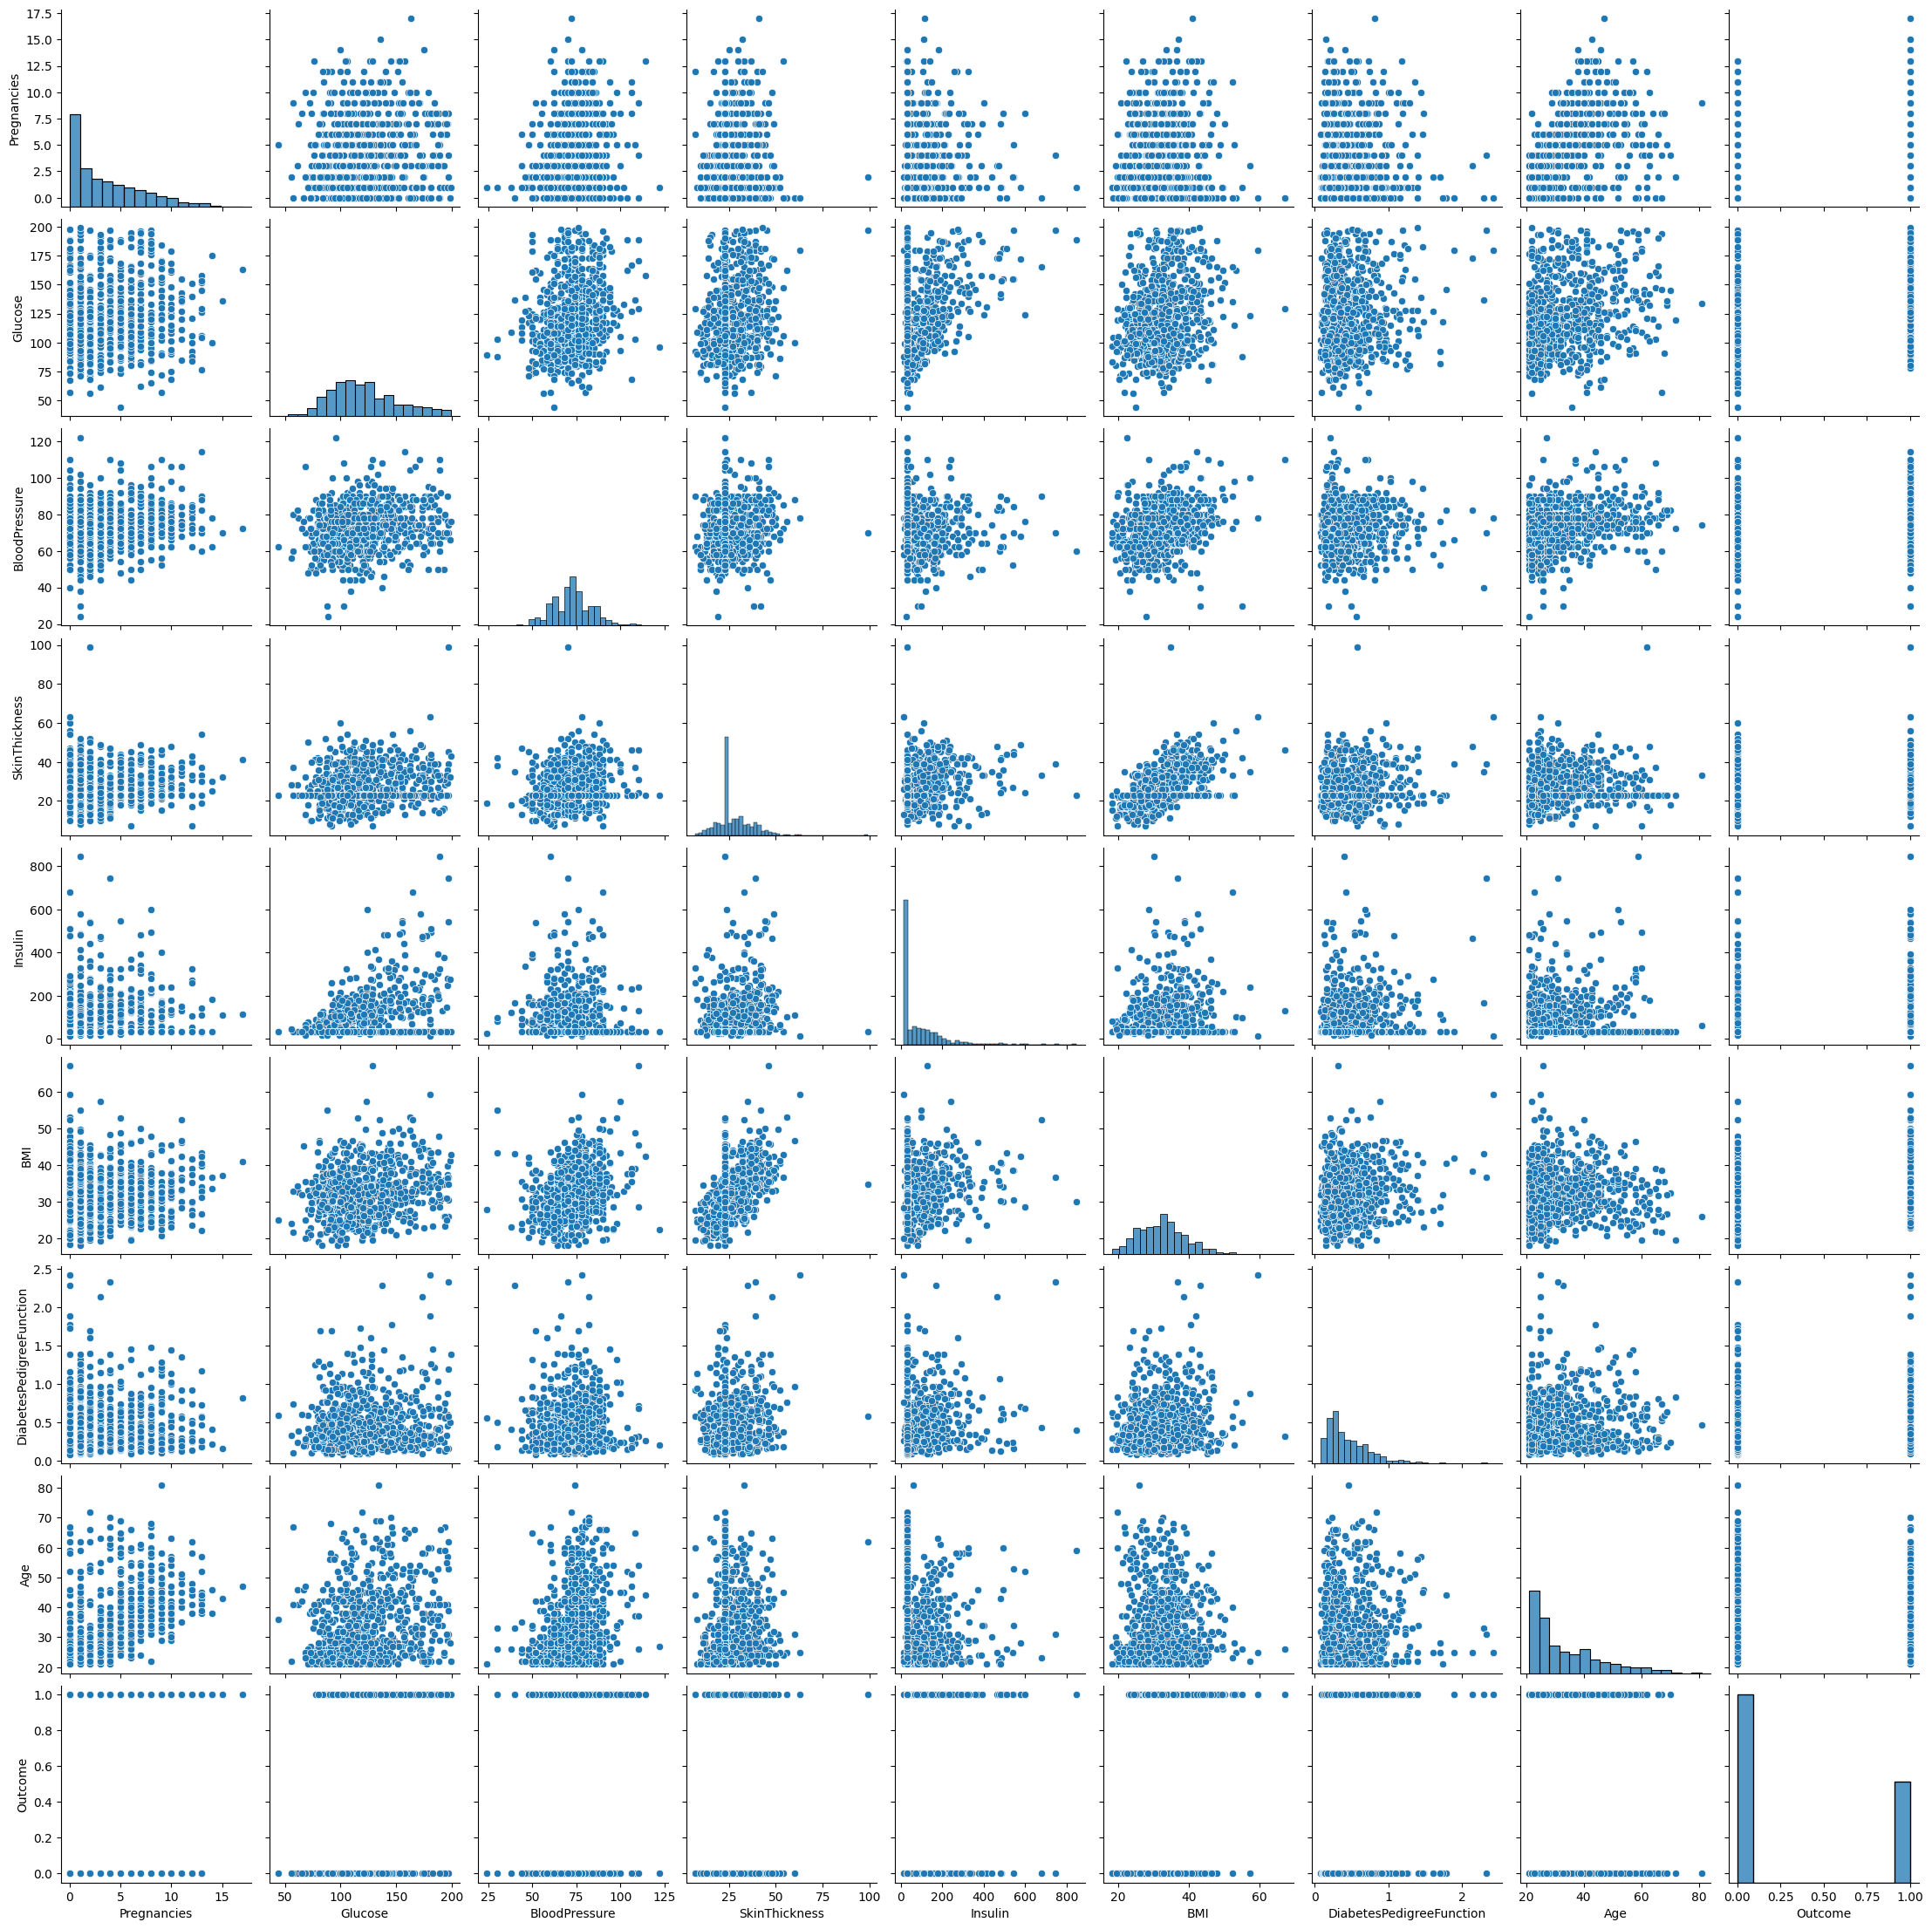

In [34]:
sns.pairplot(diabetes)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x=diabetes.drop('Outcome', axis= 1)
y= diabetes['Outcome']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


In [41]:
(diabetes['BloodPressure']-diabetes['BloodPressure'].mean())/diabetes['BloodPressure'].std()

,BloodPressure
0,-0.031969
1,-0.527975
2,-0.693310
3,-0.527975
4,-2.677331
...,...
763,0.298701
764,-0.197304
765,-0.031969
766,-1.023980


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
#initialize the model
lr= LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()

In [78]:
#train the model
lr.fit(x_train, y_train)


LogisticRegression()

In [79]:
lr.predict_proba(x_test)

array([[0.75363226, 0.24636774],
       [0.81528984, 0.18471016],
       [0.88469592, 0.11530408],
       [0.84071137, 0.15928863],
       [0.52707772, 0.47292228],
       [0.60239962, 0.39760038],
       [0.98722675, 0.01277325],
       [0.5917452 , 0.4082548 ],
       [0.43714181, 0.56285819],
       [0.22554737, 0.77445263],
       [0.76545484, 0.23454516],
       [0.09613373, 0.90386627],
       [0.65752871, 0.34247129],
       [0.72716583, 0.27283417],
       [0.92337303, 0.07662697],
       [0.61138456, 0.38861544],
       [0.87807781, 0.12192219],
       [0.93181337, 0.06818663],
       [0.24918247, 0.75081753],
       [0.41764126, 0.58235874],
       [0.80980386, 0.19019614],
       [0.93040615, 0.06959385],
       [0.47936978, 0.52063022],
       [0.91061624, 0.08938376],
       [0.46105937, 0.53894063],
       [0.09765012, 0.90234988],
       [0.88403344, 0.11596656],
       [0.9729969 , 0.0270031 ],
       [0.75245201, 0.24754799],
       [0.90114909, 0.09885091],
       [0.

In [46]:
lr.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [48]:
y_pred=lr.predict(x_test)

In [69]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'prob_no_diab' :lr.predict_proba(x_test)[:,0],
              'prob_diab': lr.predict_proba(x_test)[:,1]})

,Actual,Predicted,prob_no_diab,prob_diab
668,0,0,0.753632,0.246368
324,0,0,0.815290,0.184710
624,0,0,0.884696,0.115304
690,0,0,0.840711,0.159289
473,0,0,0.527078,0.472922
...,...,...,...,...
355,1,1,0.226818,0.773182
534,0,0,0.892787,0.107213
344,0,0,0.555832,0.444168
296,1,0,0.769177,0.230823


In [68]:
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'prob_no_diab' :lr.predict_proba(x_test)[:,0],
              'prob_diab': lr.predict_proba(x_test)[:,1]})

In [65]:
df_new.loc[473,:]

,473
Actual,0.000000
Predicted,0.000000
prob_no_diab,0.527078
prob_diab,0.472922


In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [67]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7662337662337663
[[82 17]
 [19 36]]


In [70]:
print(precision_score(y_test, y_pred))

0.6792452830188679


In [71]:
print(recall_score(y_test, y_pred))

0.6545454545454545


In [74]:
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


In [75]:
f1_score(y_test, y_pred)

0.6666666666666666

In [76]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
dt.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [82]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'prob_no_diab' :dt.predict_proba(x_test)[:,0],
              'prob_diab': dt.predict_proba(x_test)[:,1]})

,Actual,Predicted,prob_no_diab,prob_diab
668,0,0,1.0,0.0
324,0,0,1.0,0.0
624,0,0,1.0,0.0
690,0,0,1.0,0.0
473,0,0,1.0,0.0
...,...,...,...,...
355,1,1,0.0,1.0
534,0,0,1.0,0.0
344,0,0,0.0,1.0
296,1,0,0.0,1.0


In [83]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7662337662337663
[[82 17]
 [19 36]]


In [77]:
rf.fit(x_train, y_train)

RandomForestClassifier()